In [1]:
import importlib

import common

importlib.reload(common)

<module 'common' from 'C:\\Users\\j\\IdeaProjects\\fiit_masters_thesis_project\\jupyter\\common.py'>

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlalchemy

from common import create_engine
from common import display_all
from common import figsize
from common import save_df


from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters() # converters e.g. for datetime in plots

In [2]:
engine = create_engine('db-conf.json', 'local')
pd.sql = lambda sql: pd.read_sql(sqlalchemy.text(sql), con=engine)

Nacitanie dat z db (live data z monant snapshotu)

In [3]:
fetch_data_query = '''
WITH fb_popularity AS (SELECT sbq.url, sbq.sync_date, sbq.reaction_count, sbq.comment_count, sbq.share_count
                       FROM (
                                SELECT afe.*, row_number() OVER (PARTITION BY url ORDER BY sync_date) as rn
                                FROM article_fb_engagement afe) sbq
                       WHERE sbq.rn = 1
)
SELECT a.id,
       a.url,
       title,
       perex,
       body,
       published_at,
       extracted_at,
       a.source_id,
       category,
       other_info,
       aut.name                                       as author_name,
       s.id                                           as source_id,
       s.name                                         as source_name,
       s.url                                          as source_url,
       stype                                          as source_type,
       is_reliable::integer                           as source_is_reliable,
       sync_date                                      as fb_sync_date,
       reaction_count                                 as fb_reaction_count,
       comment_count                                  as fb_comment_count,
       share_count                                    as fb_share_count,
       (reaction_count + comment_count + share_count) as fb_popularity
FROM article a
         JOIN source s on a.source_id = s.id
         JOIN (SELECT * FROM fb_popularity) p ON a.url = p.url
         JOIN author aut on a.author_id = aut.id
WHERE s.url !~ '(\.sk$)|(\.cz$)' -- remove cz/sk sources
  AND s.name NOT IN ('badatel.net', -- cz/sk portals not using cz/sk domain
                    'energiezivota.com')
  AND a.published_at IS NOT NULL
  AND s.is_reliable IS NOT NULL;
'''

df = pd.sql(fetch_data_query)
df_copy = df.copy()

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153929 entries, 0 to 153928
Data columns (total 21 columns):
id                    153929 non-null int64
url                   153929 non-null object
title                 153929 non-null object
perex                 133594 non-null object
body                  153723 non-null object
published_at          153929 non-null datetime64[ns]
extracted_at          153929 non-null datetime64[ns]
source_id             153929 non-null int64
category              132391 non-null object
other_info            153929 non-null object
author_name           153929 non-null object
source_id             153929 non-null int64
source_name           153929 non-null object
source_url            153929 non-null object
source_type           153929 non-null object
source_is_reliable    153929 non-null int64
fb_sync_date          153929 non-null datetime64[ns]
fb_reaction_count     153929 non-null int64
fb_comment_count      153929 non-null int64
fb_share_count  

In [97]:
df.head()

,id,url,title,perex,body,published_at,extracted_at,source_id,category,other_info,...,source_id,source_name,source_url,source_type,source_is_reliable,fb_sync_date,fb_reaction_count,fb_comment_count,fb_share_count,fb_popularity
0,355149,http://blog.healthadvocate.com/2009/12/discove...,Discover Health Advocacy: Coverage for hospita...,"<p>We built our company, Health Advocate, Inc....","We built our company, Health Advocate, Inc., t...",2009-12-29 16:22:36,2019-09-06 04:02:09.831386,223,Advocacy in Action,"{'tags': ['Advocacy', 'Health Advocate', 'Heal...",...,223,healthadvocate.com,http://healthadvocate.com,news_website,1,2019-10-14 21:53:23.370152,0,0,0,0
1,355150,http://blog.healthadvocate.com/2010/01/discove...,Discover Health Advocacy: Comparing medical costs,"<p>We built our company, Health Advocate, Inc....","We built our company, Health Advocate, Inc., t...",2010-01-18 16:54:05,2019-09-06 04:02:10.047665,223,Advocacy in Action,"{'tags': ['Benefits', 'Health Advocacy', 'Heal...",...,223,healthadvocate.com,http://healthadvocate.com,news_website,1,2019-10-14 21:53:23.370164,0,0,0,0
2,355151,http://blog.healthadvocate.com/2010/01/discove...,Discover Health Advocacy: Underinsured patient...,"<p>We built our company, Health Advocate, Inc....","We built our company, Health Advocate, Inc., t...",2010-01-29 16:56:15,2019-09-06 04:02:10.226448,223,Advocacy in Action,"{'tags': ['Health Advocacy', 'Health Advocate'...",...,223,healthadvocate.com,http://healthadvocate.com,news_website,1,2019-10-14 21:53:23.370171,0,0,0,0
3,355152,http://blog.healthadvocate.com/2010/02/discove...,Discover Health Advocacy: Coverage denied for ...,"<p>We built our company, Health Advocate, Inc....","We built our company, Health Advocate, Inc., t...",2010-02-04 16:59:52,2019-09-06 04:02:10.402828,223,Advocacy in Action,"{'tags': ['Health Advocacy', 'Health Advocate'...",...,223,healthadvocate.com,http://healthadvocate.com,news_website,1,2019-10-14 21:53:23.370178,0,0,0,0
4,355153,http://blog.healthadvocate.com/2010/02/discove...,Discover Health Advocacy: Unreasonable balance...,"<p>We built our company, Health Advocate, Inc....","We built our company, Health Advocate, Inc., t...",2010-02-10 10:39:36,2019-09-06 04:02:10.593390,223,Advocacy in Action,"{'tags': ['Health Advocacy', 'Health Advocate'...",...,223,healthadvocate.com,http://healthadvocate.com,news_website,1,2019-10-14 21:53:23.370185,0,0,0,0


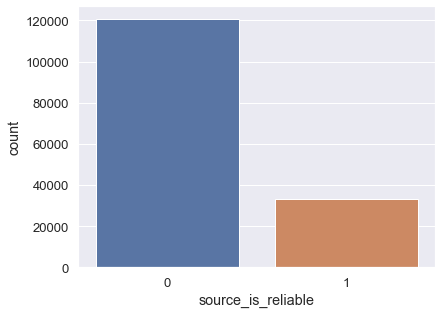

In [22]:
sns.countplot(x='source_is_reliable', data=df)

In [99]:
df['fb_popularity'].describe().apply(lambda x: '%.3f' % x)

count     153929.000
mean        1105.994
std        24603.403
min            0.000
25%            0.000
50%            1.000
75%           70.000
max      5197586.000
Name: fb_popularity, dtype: object

In [15]:
def draw_publishing_per_year(df):
    published_in_year = df.published_at.apply(lambda x: x.year)
    with figsize(plt, 20, 5):
        cplt = sns.countplot(published_in_year, color='black')
        cplt.set(xlabel='Rok publikovania', ylabel='Počet článkov')
        return cplt


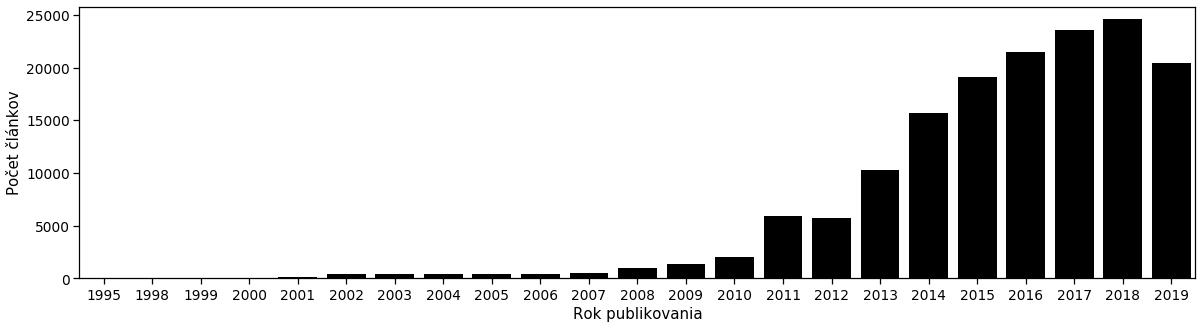

In [18]:
with sns.plotting_context("notebook", font_scale=1.25):
    draw_publishing_per_year(df).get_figure().savefig('export/clanky-per-rok.png')

Cut the articles so we use only those from 2011 - now

In [105]:
df = df[df.published_at > '2011-01-01']

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146635 entries, 12 to 153928
Data columns (total 21 columns):
id                    146635 non-null int64
url                   146635 non-null object
title                 146635 non-null object
perex                 126300 non-null object
body                  146433 non-null object
published_at          146635 non-null datetime64[ns]
extracted_at          146635 non-null datetime64[ns]
source_id             146635 non-null int64
category              125101 non-null object
other_info            146635 non-null object
author_name           146635 non-null object
source_id             146635 non-null int64
source_name           146635 non-null object
source_url            146635 non-null object
source_type           146635 non-null object
source_is_reliable    146635 non-null int64
fb_sync_date          146635 non-null datetime64[ns]
fb_reaction_count     146635 non-null int64
fb_comment_count      146635 non-null int64
fb_share_count 

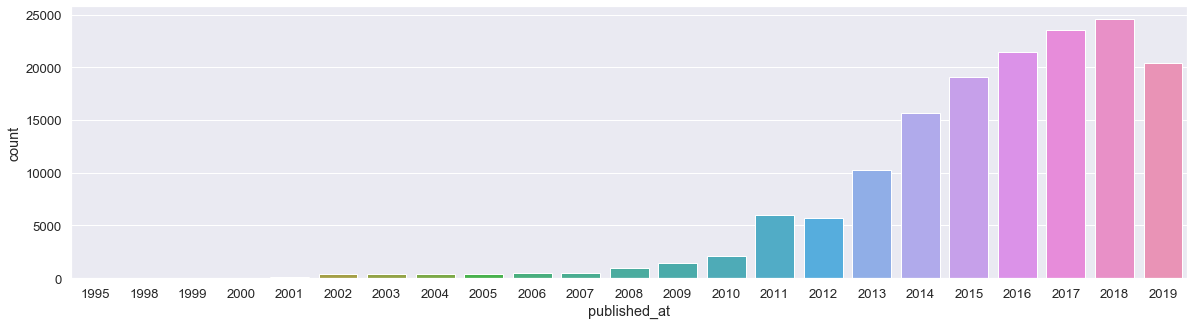

In [21]:
draw_publishing_per_year(df)

In [126]:
df[['source_name', 'source_is_reliable']].groupby('source_name').first()['source_is_reliable'].value_counts()

0    47
1    20
Name: source_is_reliable, dtype: int64

In [108]:
display_all(df[['source_is_reliable', 'fb_reaction_count', 'fb_comment_count', 'fb_share_count']] .groupby('source_is_reliable').describe())

fb_reaction_count                                           \
                               count        mean           std  min  25%  50%   
source_is_reliable                                                              
0                           114859.0  893.768882  20611.184983  0.0  0.0  0.0   
1                            31776.0  208.225076   2834.667994  0.0  0.0  0.0   

                                    fb_comment_count                           \
                     75%        max            count        mean          std   
source_is_reliable                                                              
0                   44.0  3929532.0         114859.0  203.294735  4484.642919   
1                   25.0   297646.0          31776.0   51.683787   553.897120   

                                                 fb_share_count              \
                    min  25%  50%  75%       max          count        mean   
source_is_reliable                                                            
0                   0.0  0.0  0.0  6.0  714968.0       114859.0  288.637695   
1                   0.0  0.0  0.0  3.0   41610.0        31776.0   73.679884   

                                                                
                            std  min  25%  50%   75%       max  
source_is_reliable                                              
0                   4504.288872  0.0  0.0  1.0  31.0  572708.0  
1                    788.062916  0.0  0.0  0.0  16.0   59635.0

In [112]:
df_gb_pop = df.groupby('source_url')['fb_popularity'].describe().sort_values('count', ascending=False)
df_gb_pop['is_reliable'] = df.groupby('source_url')['source_is_reliable'].first()
display_all(df_gb_pop)

,count,mean,std,min,25%,50%,75%,max,is_reliable
source_url,,,,,,,,,
http://naturalnews.com,20328.0,1246.524646,41930.873968,0.0,18.00,89.0,253.00,5197586.0,0
http://naturalnewsblogs.com,17750.0,86.916169,2295.060570,0.0,0.00,0.0,1.00,203855.0,0
http://neurosciencenews.com,12901.0,264.496241,4026.333981,0.0,0.00,0.0,40.00,294411.0,1
http://statnews.com,12045.0,202.446658,1809.455181,0.0,0.00,0.0,20.00,82773.0,1
http://naturalsociety.com,7242.0,10.373101,603.081233,0.0,0.00,0.0,0.00,49319.0,0
http://healthnutnews.com,7118.0,1675.347991,23726.154242,0.0,3.00,172.0,739.00,1810067.0,0
http://healthimpactnews.com,6220.0,352.679582,10930.583972,0.0,0.00,0.0,8.00,841807.0,0
http://infowars.com,5832.0,54.567215,386.209916,0.0,0.00,0.0,8.00,16902.0,0
http://themindunleashed.com,5277.0,7011.541975,54659.037203,0.0,0.00,10.0,1179.00,1858055.0,0


In [113]:
df[df.source_is_reliable == True].groupby('source_url')['fb_popularity'].describe().sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
source_url,,,,,,,,
http://neurosciencenews.com,12901.0,264.496241,4026.333981,0.0,0.00,0.0,40.00,294411.0
http://statnews.com,12045.0,202.446658,1809.455181,0.0,0.00,0.0,20.00,82773.0
http://sciencebasedmedicine.org,2455.0,807.595112,2334.690829,0.0,4.00,132.0,689.00,45781.0
http://healthadvocate.com,1359.0,8.983812,100.190274,0.0,0.00,3.0,9.00,3678.0
http://vaxopedia.org,1015.0,77.806897,224.263713,0.0,1.00,15.0,59.50,3024.0
http://youngwomenshealth.org,932.0,7.590129,49.387129,0.0,0.00,0.0,2.25,903.0
http://webmd.com,272.0,2569.562500,22156.466964,2.0,60.50,205.5,713.75,355985.0
http://medicalnewstoday.com,242.0,689.475207,900.201292,5.0,185.25,377.0,802.50,5067.0
http://nytimes.com,205.0,8097.497561,21346.440098,12.0,639.00,1833.0,5193.00,186951.0


In [116]:
df[df.source_is_reliable == False].groupby('source_url')['fb_popularity'].describe().sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
source_url,,,,,,,,
http://naturalnews.com,20328.0,1246.524646,41930.873968,0.0,18.0,89.0,253.00,5197586.0
http://naturalnewsblogs.com,17750.0,86.916169,2295.060570,0.0,0.0,0.0,1.00,203855.0
http://naturalsociety.com,7242.0,10.373101,603.081233,0.0,0.0,0.0,0.00,49319.0
http://healthnutnews.com,7118.0,1675.347991,23726.154242,0.0,3.0,172.0,739.00,1810067.0
http://healthimpactnews.com,6220.0,352.679582,10930.583972,0.0,0.0,0.0,8.00,841807.0
http://infowars.com,5832.0,54.567215,386.209916,0.0,0.0,0.0,8.00,16902.0
http://themindunleashed.com,5277.0,7011.541975,54659.037203,0.0,0.0,10.0,1179.00,1858055.0
http://realfarmacy.com,4750.0,4985.774105,48064.323120,0.0,0.0,1.0,120.75,2165131.0
http://hsionline.com,3992.0,1.631513,17.331289,0.0,0.0,0.0,0.00,726.0


### Save final data

In [7]:
save_df(df, 'final_data.pickle')